In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [4]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [5]:
# Load dataset
data = pd.read_csv("Mall_Customers.csv")
print(data.head())

# Extract features (Annual Income and Spending Score)
features = data.iloc[:, [3, 4]].values
print(features[:5])


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


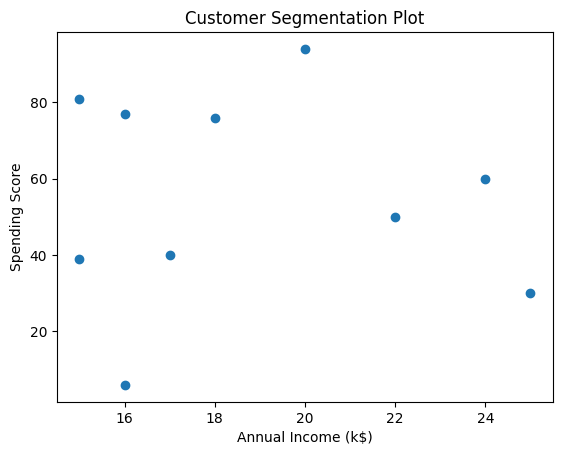

In [6]:
plt.scatter(features[:, 0], features[:, 1])
plt.title("Customer Segmentation Plot")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.show()


In [7]:
kmeans = KMeans(n_clusters=5, random_state=0)
pred_cluster = kmeans.fit_predict(features)

# Check cluster counts
print("Cluster 0 count:", len(features[pred_cluster == 0]))
print("Cluster 1 count:", len(features[pred_cluster == 1]))
print("Cluster 2 count:", len(features[pred_cluster == 2]))
print("Cluster 3 count:", len(features[pred_cluster == 3]))
print("Cluster 4 count:", len(features[pred_cluster == 4]))


Cluster 0 count: 3
Cluster 1 count: 3
Cluster 2 count: 1
Cluster 3 count: 1
Cluster 4 count: 2


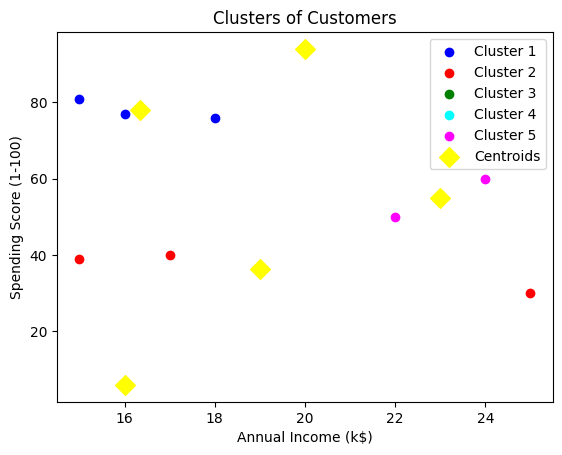

In [8]:
plt.scatter(features[pred_cluster == 0, 0], features[pred_cluster == 0, 1], c='blue', label='Cluster 1')
plt.scatter(features[pred_cluster == 1, 0], features[pred_cluster == 1, 1], c='red', label='Cluster 2')
plt.scatter(features[pred_cluster == 2, 0], features[pred_cluster == 2, 1], c='green', label='Cluster 3')
plt.scatter(features[pred_cluster == 3, 0], features[pred_cluster == 3, 1], c='cyan', label='Cluster 4')
plt.scatter(features[pred_cluster == 4, 0], features[pred_cluster == 4, 1], c='magenta', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=100, c='yellow', marker='D', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


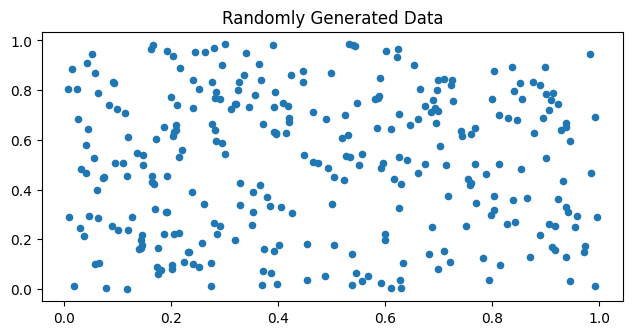

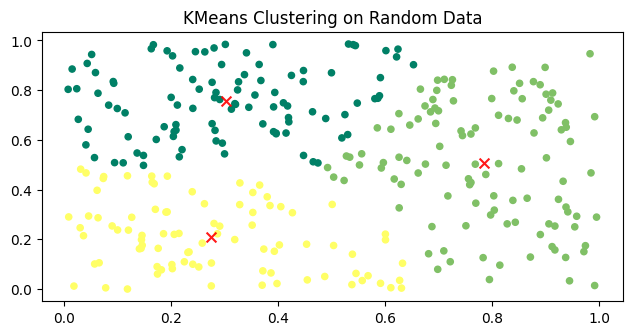

In [9]:
X = np.random.rand(300, 2)
plt.figure(figsize=(7.5, 3.5))
plt.scatter(X[:, 0], X[:, 1], s=20)
plt.title("Randomly Generated Data")
plt.show()

# Train KMeans on it
kmeans = KMeans(n_clusters=3, max_iter=100)
kmeans.fit(X)

# Visualize Clusters
plt.figure(figsize=(7.5, 3.5))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=20, cmap='summer')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='x', c='r', s=50, alpha=0.9)
plt.title("KMeans Clustering on Random Data")
plt.show()


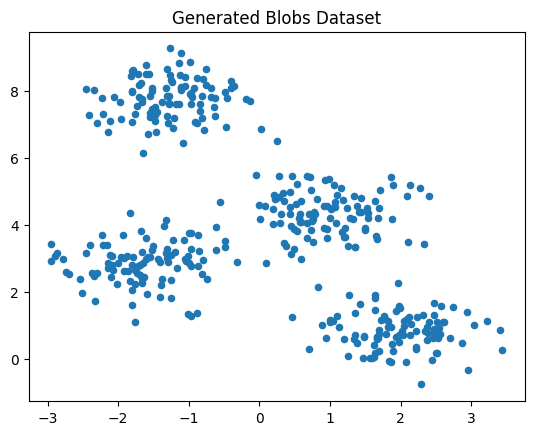

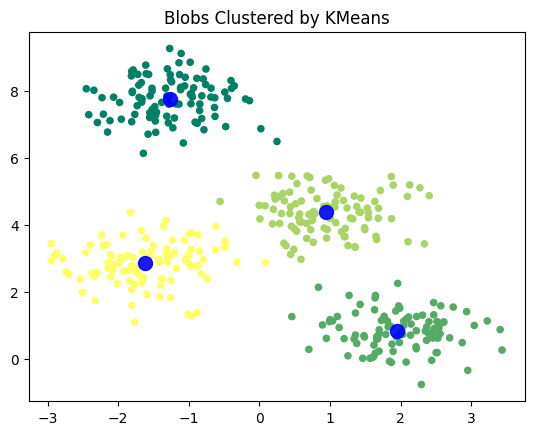

In [10]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=20)
plt.title("Generated Blobs Dataset")
plt.show()

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.9)
plt.title("Blobs Clustered by KMeans")
plt.show()


Digits shape: (1797, 64)
Accuracy: 0.7440178074568725


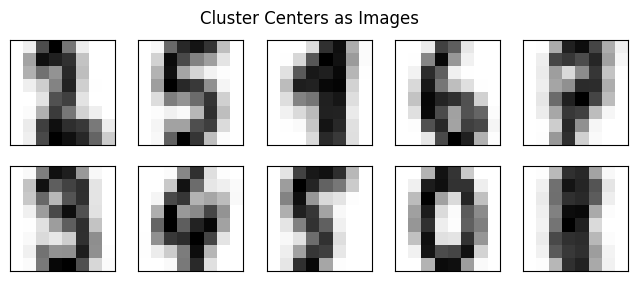

In [11]:
from sklearn.datasets import load_digits
from scipy.stats import mode
from sklearn.metrics import accuracy_score

digits = load_digits()
print("Digits shape:", digits.data.shape)

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)

# Match cluster labels with actual digits
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Accuracy
print("Accuracy:", accuracy_score(digits.target, labels))

# Visualize Centroids
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
plt.suptitle("Cluster Centers as Images")
plt.show()


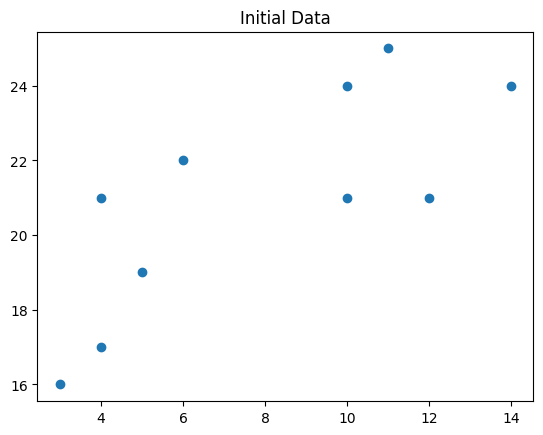

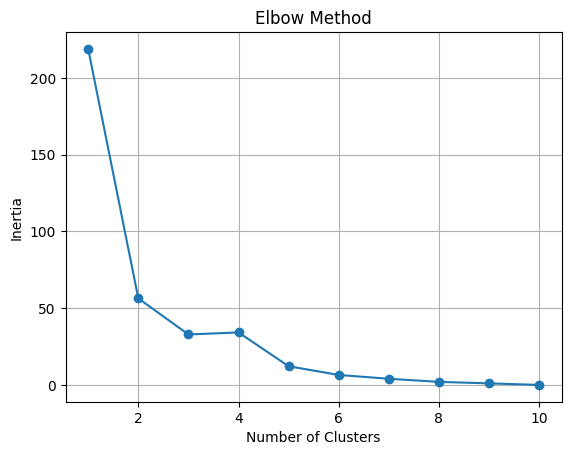

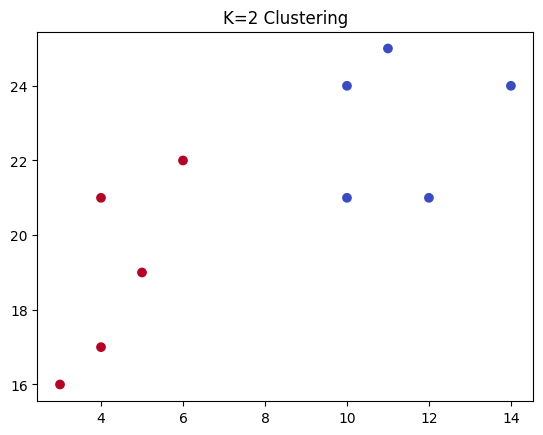

In [12]:
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
plt.scatter(x, y)
plt.title("Initial Data")
plt.show()

data = list(zip(x, y))
inertias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Retrain with K=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
plt.scatter(x, y, c=kmeans.labels_, cmap='coolwarm')
plt.title("K=2 Clustering")
plt.show()
